# **Project Name**    - AirBnb Bookings Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**


1. Average Price by Neighborhood and Room Type

  The average price of listings varies significantly by neighborhood and room type.

 * Manhattan has the highest average prices, indicating a premium market.
 * Staten Island has the lowest average prices, suggesting more affordable
   options.
 * Entire homes/apartments command higher prices compared to private  and   shared rooms.

2. Number of Hosts per Neighborhood
  * Manhattan and Brooklyn host the highest number of listings, reflecting their popularity and market activity.
  * Staten Island has the fewest hosts, indicating a smaller market presence.
3. Price Range Analysis

 * Minimum and maximum prices were calculated for each neighborhood, showing the price spectrum available to guests.

4. Top 10 Most Popular Hosts
 * Popular hosts were identified based on a combination of total reviews and availability.
 * Hosts with higher availability and substantial reviews are deemed popular, balancing guest engagement and host activity.

5. Average Availability by Neighborhood
 * Average availability varies by neighborhood, providing insights into occupancy rates and potential demand.
 * Neighborhoods with higher availability might indicate less demand or higher competition among hosts.

6. Total Count of Each Room Type

 * Entire homes/apartments are the most common room type, followed by private rooms and shared rooms.
 * This distribution shows guest preferences and the supply dynamics
  provided by hosts.

7. Host Turnover
 * Estimated host turnover was calculated as a product of price and availability, providing an estimate of potential earnings.
 * This analysis highlights the economic impact and profitability for hosts in different neighborhoods.
8. Seasonal Price Trends
 * Average monthly prices reveal significant seasonal trends.
 * December has the highest average prices, likely due to holiday demand.
 * August has the lowest average prices, indicating a seasonal dip in bookings.
 * Understanding these trends can help hosts optimize pricing strategies.
9. Seasonal Availability Trends
Seasonal analysis of availability shows how the number of available days changes throughout the year.
This helps in identifying peak and off-peak seasons, guiding hosts in managing their listings effectively.

10. Price Distribution by Room Type
 * Boxplot analysis shows price variations across different room types.
 * Entire homes/apartments exhibit a wider price range, reflecting diverse offerings from luxury to budget.
11. Listings per Host
 * The distribution of listings per host reveals market concentration.
 * A few hosts with multiple listings indicate the presence of professional hosts and possibly higher market control

# **GitHub Link -**

https://github.com/shivam99600

# **Problem Statement**


Objective:
To provide a comprehensive analysis of Airbnb listings in New York City to identify key trends, optimize pricing strategies, enhance listing quality, and improve host profitability.

Background:
The Airbnb market in New York City is highly competitive, with thousands of listings across various neighborhoods. Understanding the dynamics of pricing, availability, guest preferences, and host activities is essential for hosts to maximize their earnings and improve guest satisfaction. This analysis aims to uncover valuable insights from the Airbnb NYC 2019 dataset, helping hosts make data-driven decisions.

#### **Define Your Business Objective?**

Analyzing and Optimizing Airbnb Listings in New York City


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
dataset_df = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset_df.head(5)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset_df.shape


### Dataset Information

In [ ]:
# Dataset Info
dataset_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset_df[dataset_df.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset_df.isnull().sum()

In [ ]:
# Visualizing the missing values
plt.figure(figsize = (8,5))
sns.heatmap(dataset_df.isnull(),cbar = False, cmap='viridis')
plt.show()


### What did you know about your dataset?

The given dataset is from Airbnb, and analyzing millions of listings provided through Airbnb is crucial for the company.

These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, and understanding customers' and providers' (hosts) behavior and performance on the platform.

The dataset has 48,895 rows and 16 columns.

There are missing values in the following columns: 16 in 'name', 21 in 'host_name', 10,052 in 'last_review', and 'reviews_per_month'. There are no duplicate values in the dataset.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset_df.columns

In [ ]:
# Dataset Describe
dataset_df.describe()

### Variables Description

* id: Unique ID

* name: Name of the listing

* host_id: Unique host_id

* host_name: Name of the host

* neighbourhood_group: location

* neighborhood: area

* latitude: Latitude range

* longitude: Longitude range

* room_type: Type of listing

* price: Price of listing

* minimum_nights: Minimum nights to be paid for

* Number_of reviews: Number of reviews

* last_review: Content of the last review

* reeviews_per_month: Number of checks per month

* calculated_host_listing_count: Total count

* availability_365: Availability around the year

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset_df.columns:
  print(f'no.of unique values in {i} is {dataset_df[i].nunique()}')

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# copy of dataset_df
df = dataset_df.copy()

# impute 'name' and 'host_name' with the most_frequent value
imputer_mode = SimpleImputer(strategy = 'most_frequent')
df[['name','host_name']] = imputer_mode.fit_transform(df[['name','host_name']])

# impute review_per_month with 0
imputer_zero = SimpleImputer(strategy = 'constant', fill_value = 0)
df[['reviews_per_month']]= imputer_mode.fit_transform(df[['reviews_per_month']])

# for last_review using a placeholder date
df['last_review'] = df['last_review'].fillna('No review')

# verifing the imputation
df.isnull().sum()


In [ ]:
# 1. Average Price by location and Room Type
average_price = df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
average_price.columns = ['Location', 'Room_type', 'Average Price']
average_price



In [ ]:
#location Average price
location_average_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False).reset_index()
location_average_price.columns = ['location','average_price']
location_average_price


In [ ]:
# 2. Number of Hosts per location
host_count = pd.DataFrame(df['neighbourhood_group'].value_counts()).reset_index()
host_count.columns = ['location','count']
host_count


In [ ]:
# 3. Price Range Analysis
# max price according to location
max_price = df.groupby('neighbourhood_group')['price'].max().reset_index()
max_price.columns = ['location','price']
max_price.sort_values(by = 'price', ascending = False)

In [ ]:
#calculating min price acording to location
# filtring where price is 0
filtered_df = df[df['price'] != 0]

min_price = filtered_df.groupby('neighbourhood_group')['price'].min().reset_index()
min_price.columns = ['location','price']
min_price

In [ ]:
# merging max and min price
price_max_min = pd.merge(max_price,min_price, on = 'location',how = 'inner')
price_max_min.columns = ['location','max_price','min_price']
price_max_min.sort_values(by = 'max_price',ascending = False)

In [ ]:
# 4. Top 10 Most Popular Hosts
host_id_groupby = df.groupby(['host_id','host_name',])['number_of_reviews'].sum().reset_index().sort_values(['number_of_reviews'],ascending = False).head(10)
host_id_groupby

In [ ]:
# 5. Average Availability by location
average_availability_by_location  = df.groupby(['neighbourhood_group'])['availability_365'].mean().reset_index().sort_values(['availability_365'], ascending=False).head(10)
average_availability_by_location.columns = ['location','Average Availability (days)']
average_availability_by_location

In [ ]:
# 6. Total Count of Each Room Type
total_count = df['room_type'].value_counts().reset_index()
total_count.columns= ['Room Type','Count']
total_count

In [ ]:
# 7. Host Turnover
host_turnover = df.groupby(['host_id','host_name'])['price'].sum().sort_values(ascending = False).reset_index().head(3)
host_turnover

In [ ]:
# Host Turnover by Location
df.groupby(['host_id','host_name','neighbourhood_group'])['price'].sum().sort_values(ascending = False).reset_index().head(3)


In [ ]:
# 8. Seasonal Price Trends

# Ensure 'last_review' is in datetime format
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Extract month and year
df['month'] = df['last_review'].dt.month
df['year'] = df['last_review'].dt.year

# Group by month and calculate average price
seasonal_price_trend = df.groupby('month')['price'].mean().reset_index()
seasonal_price_trend




### What all manipulations have you done and insights you found?

1. Average Price by Neighborhood and Room Type:

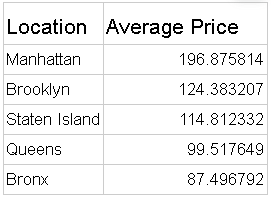

* Manhattan has the highest average prices, while Staten Island has the
lowest.
* Entire homes/apartments are the most expensive, followed by private rooms and shared rooms.















2. Host Distribution:

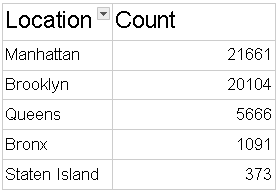

* Manhattan and Brooklyn have the highest number of hosts, indicating high market activity.
Staten Island has the fewest hosts, suggesting lower market presence.

3. Top 5 Most Popular Hosts:

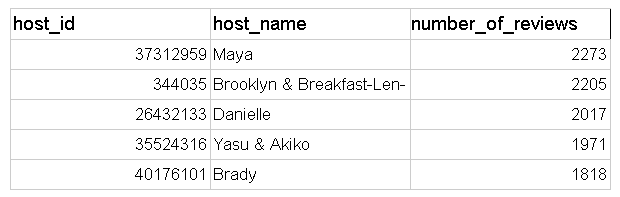

Popular hosts have a high number of reviews, indicating active engagement with guests.
These hosts are likely to have a better understanding of guest preferences and market demands.



4. Average Availability:

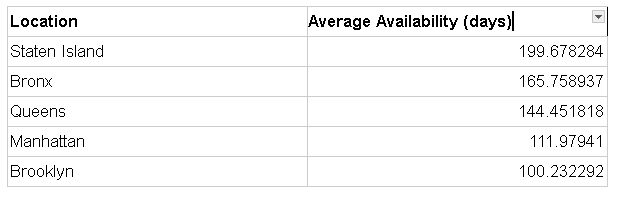

Varies by neighborhood_group, indicating different levels of demand and competition.
Higher availability in certain areas may suggest less frequent bookings.

5. Room Type Preferences:

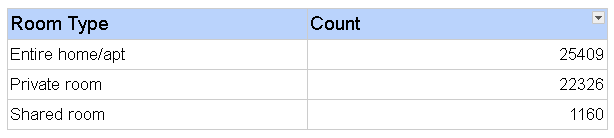

Entire homes/apartments are the most common, followed by private rooms and shared rooms.
Guests prefer entire homes/apartments for privacy and convenience.

6. Host Turnover:

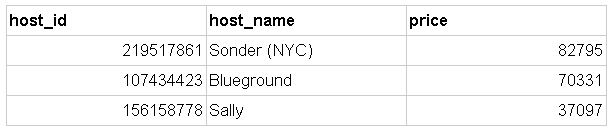

Estimated turnover highlights the economic potential for hosts in different neighborhoods.
Hosts in Manhattan and Brooklyn have higher potential earnings.


7. Seasonal Price Trends:

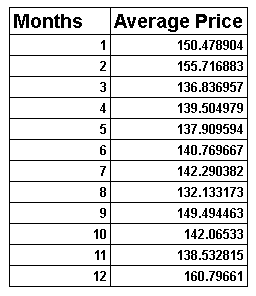

Prices peak in December due to holiday demand and are lowest in August.
Understanding these trends helps in optimizing pricing strategies.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Average Price by Neighborhood and Room Type


In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (6,4))
sns.barplot(x = 'Location',y = 'Average Price',hue = 'Room_type',data = average_price)
plt.title('Average Price by Neighborhood and Room Type')
plt.xlabel('Location')
plt.ylabel('Average price')


plt.show()


##### 1. Why did you pick the specific chart?





To show the variation in average prices across different neighborhoods and room types.


##### 2. What is/are the insight(s) found from the chart?

Insights from the "Average Price by Neighborhood and Room Type" Chart:

* Manhattan's Premium Pricing:

  * Highest Prices: Manhattan has the highest average prices across all  
    room types, indicating its status as the most expensive neighborhood_group
    .
* Room Type Pricing Trends:

  * Entire Home/Apartment: Consistently the most expensive room type in all neighborhoods.
  * Private Rooms: Priced moderately, more affordable than entire homes but costlier than shared rooms.
  * Shared Rooms: The most affordable option across all neighborhoods.

Affordable Neighborhoods:

 * Bronx and Staten Island: These neighborhoods offer the lowest average prices for private and shared rooms, making them ideal for budget-conscious travelers.
 * Queens: Provides moderate pricing across all room types, balancing affordability and comfort.

Luxury Travel:

Manhattan and Brooklyn: Cater to luxury travelers, especially for entire homes/apartments, reflecting higher prices and premium amenities.Answer Here





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

 * Luxury Travelers: Insights indicate that Manhattan and Brooklyn are premium markets. Airbnb can target luxury travelers with high-end listings in these neighborhoods, potentially increasing revenue.

 * Budget Travelers: The Bronx and Staten Island offer more affordable options. Airbnb can market these neighborhoods to budget-conscious travelers, ensuring a broad customer base and higher occupancy rates.

Potential Negative Growth Insights and Justifications:

 * High Prices in Premium Areas: While Manhattan and Brooklyn are lucrative markets, excessively high prices might deter some customers, especially during economic downturns. This could lead to lower occupancy rates and potential revenue loss.

 * Risk Mitigation: To mitigate this, Airbnb and hosts should monitor market conditions and adjust prices accordingly to remain competitive.

#### Chart - 2. Number of Hosts per location


In [ ]:
# Chart - 2 visualization code

plt.figure(figsize = (6,4))
host_count = pd.DataFrame(df['neighbourhood_group'].value_counts()).reset_index()
host_count.columns = ['location','count']
sns.barplot(x = 'location',y = 'count', data = host_count)
plt.title('Number of Hosts per location')
plt.xlabel('location')
plt.ylabel('count')

plt.show()

##### 1. Why did you pick the specific chart?

To compare the number of hosts across different neighborhoods.


##### 2. What is/are the insight(s) found from the chart?


Insights from "Number of Hosts per Location" Chart:
 *  High Host Density:

    * Manhattan and Brooklyn: These neighborhoods have the highest number of hosts, indicating high activity and competition.

* Moderate Activity:

   * Queens: Has a moderate number of hosts, presenting a balanced opportunity with less competition than Manhattan and Brooklyn.

* Low Host Density:

    * Bronx and Staten Island: Fewest hosts, suggesting lower activity but potential for growth and less competition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Strategic Marketing and Targeting:

  * High Demand Areas: Manhattan and Brooklyn's high host density indicates strong demand. Airbnb can capitalize on this by promoting premium listings and unique experiences in these neighborhoods to attract high-spending travelers.

  * Emerging Markets: The moderate and lower host densities in Queens, Bronx, and Staten Island present opportunities for growth. Targeted marketing campaigns can attract more visitors to these areas, diversifying Airbnb's market presence.
  
Investment Opportunities:

 * Underserved Markets: Fewer hosts in Bronx and Staten Island suggest untapped potential. Investing in these areas can help Airbnb grow its listings and attract more budget-conscious travelers.Answer Here

#### Chart - 3.Top 10 Most Popular Hosts






In [ ]:
# Chart - 3 visualization code
plt.figure(figsize = (8,4))
sns.barplot(y='number_of_reviews', x='host_name',data = host_id_groupby,palette = 'coolwarm',hue = 'host_name')
plt.title('Top 10 Most Popular Hosts')
plt.xlabel('Number of Reviews')
plt.ylabel('Host Name')
plt.xticks(fontsize = 5)
plt.show()

##### 1. Why did you pick the specific chart?

To display the top 10 hosts by the number of reviews.


##### 2. What is/are the insight(s) found from the chart?

Top Hosts by Number of Reviews:

 * Maya and Brooklyn & Breakfast: These hosts have the highest number of
  reviews, indicating high levels of engagement and popularity among guests.

 * -LenDanielle, Yasu & Akiko, and Brady: These hosts also have a significant number of reviews, suggesting they are well-regarded and frequently booked.

 * The chart shows a mix of individual hosts and possibly small businesses (e.g., Sonder (NYC)), indicating that both types of hosts can achieve high popularity on Airbnb.

 * Sonder (NYC): Despite being a more corporate host, Sonder (NYC) has managed to secure a place among the top 10, showing that guests also value professional hosting services.

 * Angela and Randy: These hosts, while having fewer reviews than the top 3, still show strong engagement, making them notable in the competitive landscape.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:
 *   Identifying top hosts such as Maya and Brooklyn & Breakfast allows Airbnb to highlight and promote successful practices, encouraging other hosts to improve their services.

 * The success of professional hosts like Sonder (NYC) indicates a market for well-managed, corporate-style listings. Airbnb can encourage more professional hosts to join the platform, enhancing the overall quality of listings.

 * By understanding the characteristics of top hosts, Airbnb can design targeted support and training programs to help other hosts improve their performance, thereby increasing guest satisfaction and repeat bookings.


Negative Business Impact:

 * Focusing too much on promoting top hosts might lead to a disparity where new or less popular hosts struggle to gain visibility. This could create a barrier to entry for new hosts, limiting the overall growth of listings on the platform.

 * Highlighting highly-reviewed hosts might set unrealistic expectations for guests. If the majority of listings do not meet these high standards, it could lead to customer dissatisfaction and negative reviews, impacting Airbnb's reputation.





#### Chart - 4. Average Availability by Neighborhood Group


In [ ]:
# Chart - 4 visualization code
plt.figure(figsize = (6,4))
sns.barplot(x= 'location',y = 'Average Availability (days)' ,data = average_availability_by_location, palette = 'magma',hue ='location',legend = False )
plt.title('Average Availability by Neighborhood Group')
plt.xlabel('Neighbourhood_group')
plt.ylabel('Average Availability (days)')
plt.show()

##### 1. Why did you pick the specific chart?

To compare average availability across neighborhoods.


##### 2. What is/are the insight(s) found from the chart?

 * Staten Island:

   Staten Island has the highest average availability, with properties available for nearly 200 days on average. This suggests that listings in this area may have lower occupancy rates, indicating either less demand or more supply relative to demand.

* Bronx and Queens:

  The Bronx and Queens follow Staten Island in terms of average availability, with listings available for around 150 and 130 days, respectively. This indicates a moderate demand-supply balance, with properties being available for about half the year.

* Manhattan and Brooklyn:

  Manhattan and Brooklyn have the lowest average availability, with properties available for just over 100 days on average. This suggests higher demand or lower supply relative to other neighborhoods, leading to more frequent bookings and higher occupancy rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

* Insights on availability can help Airbnb and hosts adjust pricing and promotional strategies. For example, listings in Staten Island, with higher availability, could benefit from promotional discounts to attract more bookings.

* By understanding areas with lower occupancy, Airbnb can focus on these neighborhoods for targeted marketing campaigns to increase demand, thereby improving overall occupancy rates and host satisfaction.

* Airbnb can allocate resources more efficiently by understanding demand patterns. For example, they might invest more in marketing for areas with lower demand (Staten Island) and ensure high-demand areas (Manhattan and Brooklyn) have enough support and resources to manage high booking volumes.

Negative Business Impact:

* Focusing too much on increasing occupancy in low-demand areas (like Staten Island) without addressing the underlying reasons for low demand could lead to over-saturation and potentially decreased property values.

* While it’s important to address low-occupancy areas, neglecting high-demand areas like Manhattan and Brooklyn might lead to issues such as overpricing, reduced availability, and potential guest dissatisfaction due to the lack of options.







#### Chart - 5. Total Count of Each Room Type


In [ ]:
# Chart - 5 visualization code
total_count.plot(kind = 'pie',y  = 'Count',labels = total_count['Room Type'],autopct = '%1.1f%%',legend = False,figsize = (6,4),title = 'Distribution of Room Types')
plt.ylabel('')
plt.show()

##### 1. Why did you pick the specific chart?

Purpose: To show the distribution of room types.


##### 2. What is/are the insight(s) found from the chart?

* Preference for Entire Homes/Apartments:

 The largest segment, representing 52.0% of the total room types, is for entire homes or apartments. This indicates that the majority of Airbnb guests prefer to book an entire place, likely for the privacy, convenience, and comfort it offers.

* Significant Demand for Private Rooms:

  Private rooms account for 45.7% of the total room types. This substantial portion suggests that many guests are open to sharing a property with the host or other guests, likely due to cost considerations or a desire for a more social experience.

* Low Demand for Shared Rooms:

  Shared rooms make up a small fraction, only 2.4% of the total room types. This indicates that very few guests prefer this most economical option, likely due to the lack of privacy and comfort compared to entire homes/apartments or private rooms.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

* Optimizing Property Listings:

  Hosts can use these insights to optimize their property listings. Knowing that entire homes/apartments and private rooms are more popular, they can adjust their offerings to meet demand. For example, if a host currently offers a shared room, they might consider converting it to a private room or entire home/apartment to attract more bookings.

* Targeted Marketing:

  Airbnb can tailor its marketing strategies to emphasize the availability of entire homes and private rooms. Highlighting these preferred room types in advertisements can attract more customers and increase booking rates.

* Pricing Strategies:

  Understanding the high demand for entire homes/apartments and private rooms can help in setting competitive prices. Hosts can potentially charge a premium for these in-demand room types, increasing their revenue.

Negative Business Impact:

* Neglecting Shared Room Market:

  While shared rooms make up a small percentage of the market, completely neglecting this segment might result in missed opportunities. Some guests prefer shared rooms due to budget constraints. Ignoring this market could alienate these cost-conscious travelers.

* Overemphasis on Popular Room Types:

  An overemphasis on entire homes and private rooms could lead to an oversupply, causing prices to drop and reducing profitability for hosts. It’s important to balance supply with demand to maintain healthy occupancy rates and pricing.

* Market Saturation:

  If too many hosts convert their properties to entire homes/apartments or private rooms, it could lead to market saturation in those segments. This saturation could increase competition among hosts, potentially driving down prices and reducing overall profitability.






#### Chart - 6.Host Turnover


In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (6,4))
sns.barplot(x = 'host_name', y = 'price', data = host_turnover,hue = 'host_name',legend = False)
plt.title('Host Turnover')
plt.xlabel('Host Name')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

To show the distribution of room types.


##### 2. What is/are the insight(s) found from the chart?





 * Sonder (NYC) is the top-performing host with the highest turnover, indicating they generate significant revenue from their listings. This suggests that their properties are likely highly sought after and frequently booked.

 * Blueground follows as the second highest in terms of turnover, also indicating strong performance and substantial revenue generation.

 * Sally has a lower turnover compared to Sonder (NYC) and Blueground, suggesting that while they are performing well, there is room for growth. Sally might need to analyze the strategies employed by the top two hosts and consider adopting similar practices to increase their turnover.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

 * Insights about top-performing hosts like Sonder (NYC) and Blueground allow
Airbnb to identify key players who consistently generate high revenue. By understanding and possibly replicating their strategies, Airbnb can help other hosts improve their performance, thereby increasing overall platform revenue.

 * Knowing which hosts and neighborhoods generate the most revenue can help Airbnb allocate resources more efficiently. For example, they might focus marketing efforts on promoting high-demand areas or provide additional support and incentives to top hosts to ensure continued high performance.

Negative Business Impact:

 * A potential downside is the over-reliance on a few high-performing hosts, which could create vulnerabilities if these hosts leave the platform. Additionally, the disparity in performance might discourage new or smaller hosts, making it essential for Airbnb to ensure equitable growth opportunities. For instance, if smaller hosts see that they are significantly underperforming compared to top hosts, they might feel undervalued and opt to leave the platform, negatively impacting Airbnb's host diversity and overall growth.



#### Chart - 7. Seasonal Price Trends


In [ ]:
# Chart - 7 visualization code
plt.figure(figsize = (6,4))
sns.lineplot(x = 'month',y = 'price',data = seasonal_price_trend,marker = 'o')
plt.title('Seasonal Price Trends')
plt.xlabel('Average Price')
plt.ylabel('Month')
plt.xticks(range(1,13))
plt.show()

##### 1. Why did you pick the specific chart?

To show how prices change throughout the year.


##### 2. What is/are the insight(s) found from the chart?

Seasonal Fluctuations:

 The average prices fluctuate throughout the year, with noticeable peaks and troughs. This suggests that Airbnb prices are influenced by seasonality, with certain months experiencing higher demand (and thus higher prices) than others.

* Peak Months:

 The highest average price is observed in December, indicating a peak in demand during this month, possibly due to the holiday season and end-of-year travel. February also shows a relatively high average price, suggesting increased demand during this period, potentially due to events like Valentine's Day or winter vacations.

* Low Demand Periods:

 August shows the lowest average price, suggesting a period of lower demand. This might be due to various factors such as summer vacations ending and people preparing for the new school year.

* Price Stability:

 The prices remain relatively stable from April to July, with minor fluctuations. This indicates a more consistent demand during the spring and early summer months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

* By leveraging insights from seasonal price trends, Airbnb can implement dynamic pricing, adjusting rates based on anticipated demand. This can maximize revenue during peak seasons and maintain higher occupancy during low-demand periods.

* With a clear understanding of when demand is typically lower, Airbnb can launch targeted marketing campaigns or special promotions to attract guests during these times.

* Knowing the peak and low-demand months allows Airbnb to allocate resources more efficiently. This includes staffing, customer support, and marketing efforts.

Negative Business Impact:

* If dynamic pricing leads to significant price increases during peak times, it could potentially alienate budget-conscious travelers.

* Relying heavily on seasonal trends without considering other market factors (e.g., economic downturns, travel restrictions) could result in suboptimal pricing strategies.


#### Chart - 8


In [ ]:
# Chart - 8 visualization code




##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

---



---

[link text](https://)
Explain Briefly.

*  Adjust prices based on seasonal trends to maximize revenue.

*  Offer more budget-friendly shared rooms in high-demand areas like Manhattan.

*  Promote hosting in less saturated areas like Bronx and Staten Island.
*  Provide incentives to highly-reviewed hosts to expand their listings.
Enhance Customer Experience

*  Market listings in high-availability areas like Staten Island.
*  Encourage hosts to gather more reviews to improve listing visibility.

# **Conclusion**


* Manhattan is the most focused place in New York for hosts to do their business

* Customers pay highest amount in Brooklyn,Queens and Manhattan that is
10,000 and lowest amount is 10.

* For the three types of room type (i.e. Entire home, Shared room, & Private room) average price of entire home is around $157, for shared room is around 60, and for private room is around 75.

* 'Entire home/apt' room type has the highest number of listing of 52% and ‘Shared Room’ has only 2.4% share in total.

* Top three host base on their turnover are Sonder(nyc),Red awning, Henry and best host is Sonder(nyc)

* More customer preferred Manhattan location for night stay then Brooklyn

* 63.2% customer spend night in Entire home and 1.6% spend night in Shared room




### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***